In [107]:
%config Completer.use_jedi = False

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydlm import dlm, trend, seasonality, modelTuner

In [109]:
df = pd.read_csv("data/h2weekly.csv")

In [110]:
df.set_index("Date", inplace=True)

In [111]:
df.head()

,IsCanceled
Date,
2015-06-21,97
2015-06-28,153
2015-07-05,228
2015-07-12,321
2015-07-19,159


<AxesSubplot:xlabel='Date'>

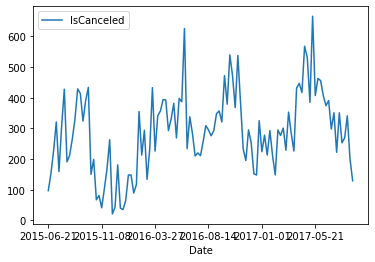

In [112]:
df.plot()

In [113]:
linear_trend = trend(degree=1, discount=0.99, name='linear_trend', w=10)

In [114]:
seasonal52 = seasonality(period=52, discount=0.99, name="seasonal52", w=10)

In [115]:
simple_dlm = dlm(df["IsCanceled"]) + linear_trend + seasonal52

In [116]:
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/Users/z001hqv/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pydlm/plot/dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


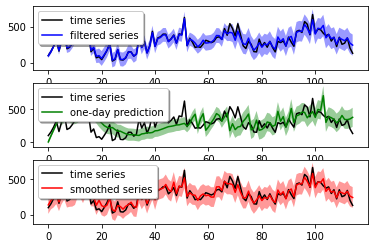

In [117]:
simple_dlm.plot()

In [118]:
mse = simple_dlm.getMSE()

In [119]:
np.sqrt(mse)

137.64231658498107

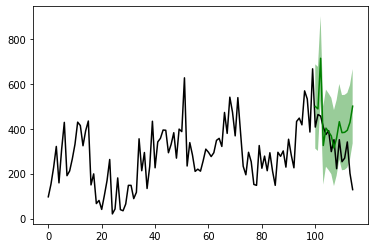

In [120]:
simple_dlm.plotPredictN(date=100, N=15)

In [102]:
%%capture
l_discount = 1.0
s_discount = 1.0
results = []
for i in range(1, 31):
    mut_liner = i * .01
    linear_discount = l_discount-mut_liner
    linear_trend = trend(degree=1, discount=linear_discount, name='linear_trend', w=1)
    for j in range(1, 11):
        mut_seasonal = j * .01
        season_discount = s_discount-mut_seasonal
        seasonal52 = seasonality(period=52, discount=season_discount, name="seasonal52", w=1)
        simple_dlm = dlm(df["IsCanceled"]) + linear_trend + seasonal52
        simple_dlm.fit()
        mse = simple_dlm.getMSE()
        rmse = np.sqrt(mse)
        results.append({"linear_discount": linear_discount,
                       "seasonal_discount": season_discount,
                       "mse": mse,
                       "rmse": rmse})
        #simple_dlm.plot()

In [103]:
results_df = pd.DataFrame(results)
results_df.sort_values(["rmse"])

,linear_discount,seasonal_discount,mse,rmse
250,0.74,0.99,12099.959511,109.999816
260,0.73,0.99,12103.504187,110.015927
240,0.75,0.99,12107.462316,110.033914
270,0.72,0.99,12117.518747,110.079602
230,0.76,0.99,12126.627956,110.120970
...,...,...,...,...
39,0.96,0.90,20519.875754,143.247603
8,0.99,0.91,20569.201496,143.419669
29,0.97,0.90,20706.238772,143.896625
19,0.98,0.90,20857.521829,144.421334


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
12099.959511487026
109.9998159611507


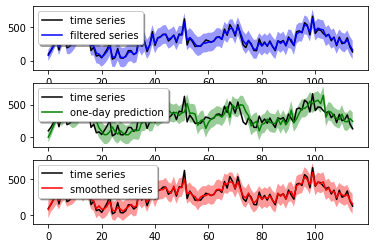

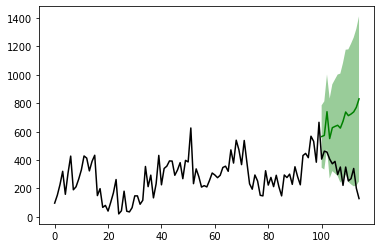

In [121]:
linear_trend = trend(degree=1, discount=0.74, name='linear_trend', w=1)
seasonal52 = seasonality(period=52, discount=0.99, name="seasonal52", w=1)
simple_dlm = dlm(df["IsCanceled"]) + linear_trend + seasonal52
simple_dlm.fit()
mse = simple_dlm.getMSE()
print(mse)
print(np.sqrt(mse))
simple_dlm.plot()
simple_dlm.plotPredictN(date=100, N=15)

I'm surprised here to see after I fitted the model with a number of different discount factors that the predictions look worse although the RMSE went down. It seemed like the model worked better better when visualizing when I used the base parameters and didn't fit. However, the RMSE is still poor given the number is SO high.

In [125]:
df.set_index(["Date"], inplace=True)

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
15447.141891684914
124.28653141706431


/Users/z001hqv/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pydlm/plot/dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


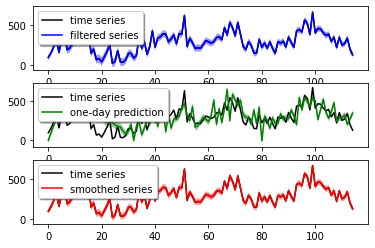

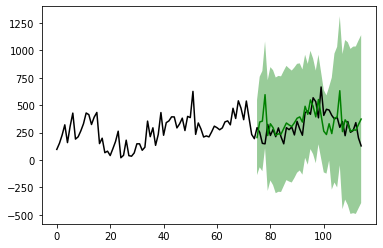

In [127]:
linear_trend = trend(degree=1, discount=0.9, name='linear_trend', w=10)
seasonal28 = seasonality(period=28, discount=0.9, name="seasonal28", w=10)
simple_dlm = dlm(df["IsCanceled"]) + linear_trend + seasonal28
simple_dlm.fit()
mse = simple_dlm.getMSE()
print(mse)
print(np.sqrt(mse))
simple_dlm.plot()
simple_dlm.plotPredictN(date=75, N=40)

In [129]:
tuner = modelTuner(method='gradient_descent', loss='mse')

In [130]:
tuned_dlm = tuner.tune(simple_dlm, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [136]:
tuned = tuner.tune(simple_dlm, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [138]:
tuned.fit()

In [139]:
tuned.getMSE()

16820.5640329715

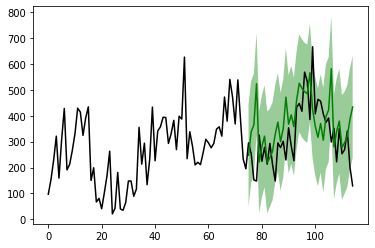

In [140]:
tuned.plotPredictN(date=75, N=40)

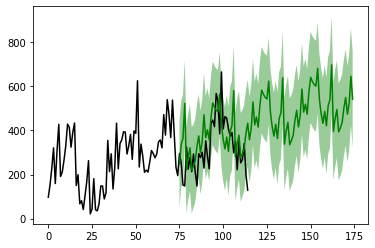

In [141]:
tuned.plotPredictN(date=75, N=100)